## Experiment : Running Gradient Boosting for the raw data 
- Run 4 different Gradient Boosting models, CatBoost, XGBoost, LightGBM and HistGradientBoosting, for DATA_Texas_District_v3.csv specifying the indices of categorical features for models to handle them except XGBoost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

# import warnings 
# warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [3]:
cols_drop=['County #',
'District #',
'm_all_d_g3_2019',
'm_ethh_d_g3_2019',
'm_etha_d_g3_2019',
'm_ethb_d_g3_2019',
'm_ethw_d_g3_2019',
'm_ecoy_d_g3_2019',
'm_eco1_d_g3_2019',
'm_ti1y_d_g3_2019',
'm_spey_d_g3_2019',
'm_all_d_g4_2019',
'm_ethh_d_g4_2019',
'm_etha_d_g4_2019',
'm_ethb_d_g4_2019',
'm_ethw_d_g4_2019',
'm_ecoy_d_g4_2019',
'm_eco1_d_g4_2019',
'm_ti1y_d_g4_2019',
'm_spey_d_g4_2019',
'm_all_d_g5_2019',
'm_ethh_d_g5_2019',
'm_etha_d_g5_2019',
'm_ethb_d_g5_2019',
'm_ethw_d_g5_2019',
'm_ecoy_d_g5_2019',
'm_eco1_d_g5_2019',
'm_ti1y_d_g5_2019',
'm_spey_d_g5_2019',
'm_all_d_g6_2019',
'm_ethh_d_g6_2019',
'm_etha_d_g6_2019',
'm_ethb_d_g6_2019',
'm_ethw_d_g6_2019',
'm_ecoy_d_g6_2019',
'm_eco1_d_g6_2019',
'm_ti1y_d_g6_2019',
'm_spey_d_g6_2019',
'm_all_d_g7_2019',
'm_ethh_d_g7_2019',
'm_etha_d_g7_2019',
'm_ethb_d_g7_2019',
'm_ethw_d_g7_2019',
'm_ecoy_d_g7_2019',
'm_eco1_d_g7_2019',
'm_ti1y_d_g7_2019',
'm_spey_d_g7_2019',
'm_all_d_g8_2019',
'm_ethh_d_g8_2019',
'm_etha_d_g8_2019',
'm_ethb_d_g8_2019',
'm_ethw_d_g8_2019',
'm_ecoy_d_g8_2019',
'm_eco1_d_g8_2019',
'm_ti1y_d_g8_2019',
'm_spey_d_g8_2019',
'm_all_d_g3_2021',
'm_ethh_d_g3_2021',
'm_etha_d_g3_2021',
'm_ethb_d_g3_2021',
'm_ethw_d_g3_2021',
'm_ecoy_d_g3_2021',
'm_eco1_d_g3_2021',
'm_ti1y_d_g3_2021',
'm_spey_d_g3_2021',
'm_all_d_g4_2021',
'm_ethh_d_g4_2021',
'm_etha_d_g4_2021',
'm_ethb_d_g4_2021',
'm_ethw_d_g4_2021',
'm_ecoy_d_g4_2021',
'm_eco1_d_g4_2021',
'm_ti1y_d_g4_2021',
'm_spey_d_g4_2021',
'm_all_d_g5_2021',
'm_ethh_d_g5_2021',
'm_etha_d_g5_2021',
'm_ethb_d_g5_2021',
'm_ethw_d_g5_2021',
'm_ecoy_d_g5_2021',
'm_eco1_d_g5_2021',
'm_ti1y_d_g5_2021',
'm_spey_d_g5_2021',
'm_all_d_g6_2021',
'm_ethh_d_g6_2021',
'm_etha_d_g6_2021',
'm_ethb_d_g6_2021',
'm_ethw_d_g6_2021',
'm_ecoy_d_g6_2021',
'm_eco1_d_g6_2021',
'm_ti1y_d_g6_2021',
'm_spey_d_g6_2021',
'm_all_d_g7_2021',
'm_ethh_d_g7_2021',
'm_etha_d_g7_2021',
'm_ethb_d_g7_2021',
'm_ethw_d_g7_2021',
'm_ecoy_d_g7_2021',
'm_eco1_d_g7_2021',
'm_ti1y_d_g7_2021',
'm_spey_d_g7_2021',
'm_all_d_g8_2021',
'm_ethh_d_g8_2021',
'm_etha_d_g8_2021',
'm_ethb_d_g8_2021',
'm_ethw_d_g8_2021',
'm_ecoy_d_g8_2021',
'm_eco1_d_g8_2021',
'm_ti1y_d_g8_2021',
'm_spey_d_g8_2021',
'Average Score Math Hispanic Grade 3 2018-2019',
'Average Score Math Asian Grade 3 2018-2019',
'Average Score Math Black Grade 3 2018-2019',
'Average Score Math White Grade 3 2018-2019',
'Average Score Math Poverty Grade 3 2018-2019',
'Average Score Math Free Lunch Grade 3 2018-2019',
'Average Score Math T1 Grade 3 2018-2019',
'Average Score Math Special Ed Grade 3 2018-2019',
'Average Score Math Hispanic Grade 4 2018-2019',
'Average Score Math Asian Grade 4 2018-2019',
'Average Score Math Black Grade 4 2018-2019',
'Average Score Math White Grade 4 2018-2019',
'Average Score Math Poverty Grade 4 2018-2019',
'Average Score Math Free Lunch Grade 4 2018-2019',
'Average Score Math T1 Grade 4 2018-2019',
'Average Score Math Special Ed Grade 4 2018-2019',
'Average Score Math Hispanic Grade 5 2018-2019',
'Average Score Math Asian Grade 5 2018-2019',
'Average Score Math Black Grade 5 2018-2019',
'Average Score Math White Grade 5 2018-2019',
'Average Score Math Poverty Grade 5 2018-2019',
'Average Score Math Free Lunch Grade 5 2018-2019',
'Average Score Math T1 Grade 5 2018-2019',
'Average Score Math Special Ed Grade 5 2018-2019',
'Average Score Math Hispanic Grade 6 2018-2019',
'Average Score Math Asian Grade 6 2018-2019',
'Average Score Math Black Grade 6 2018-2019',
'Average Score Math White Grade 6 2018-2019',
'Average Score Math Poverty Grade 6 2018-2019',
'Average Score Math Free Lunch Grade 6 2018-2019',
'Average Score Math T1 Grade 6 2018-2019',
'Average Score Math Special Ed Grade 6 2018-2019',
'Average Score Math Hispanic Grade 7 2018-2019',
'Average Score Math Asian Grade 7 2018-2019',
'Average Score Math Black Grade 7 2018-2019',
'Average Score Math White Grade 7 2018-2019',
'Average Score Math Poverty Grade 7 2018-2019',
'Average Score Math Free Lunch Grade 7 2018-2019',
'Average Score Math T1 Grade 7 2018-2019',
'Average Score Math Special Ed Grade 7 2018-2019',
'Average Score Math Hispanic Grade 8 2018-2019',
'Average Score Math Asian Grade 8 2018-2019',
'Average Score Math Black Grade 8 2018-2019',
'Average Score Math White Grade 8 2018-2019',
'Average Score Math Poverty Grade 8 2018-2019',
'Average Score Math Free Lunch Grade 8 2018-2019',
'Average Score Math T1 Grade 8 2018-2019',
'Average Score Math Special Ed Grade 8 2018-2019',
'Average Score Math Hispanic Grade 3 2020-2021',
'Average Score Math Asian Grade 3 2020-2021',
'Average Score Math Black Grade 3 2020-2021',
'Average Score Math White Grade 3 2020-2021',
'Average Score Math Poverty Grade 3 2020-2021',
'Average Score Math Free Lunch Grade 3 2020-2021',
'Average Score Math T1 Grade 3 2020-2021',
'Average Score Math Special Ed Grade 3 2020-2021',
'Average Score Math Hispanic Grade 4 2020-2021',
'Average Score Math Asian Grade 4 2020-2021',
'Average Score Math Black Grade 4 2020-2021',
'Average Score Math White Grade 4 2020-2021',
'Average Score Math Poverty Grade 4 2020-2021',
'Average Score Math Free Lunch Grade 4 2020-2021',
'Average Score Math T1 Grade 4 2020-2021',
'Average Score Math Special Ed Grade 4 2020-2021',
'Average Score Math Hispanic Grade 5 2020-2021',
'Average Score Math Asian Grade 5 2020-2021',
'Average Score Math Black Grade 5 2020-2021',
'Average Score Math White Grade 5 2020-2021',
'Average Score Math Poverty Grade 5 2020-2021',
'Average Score Math Free Lunch Grade 5 2020-2021',
'Average Score Math T1 Grade 5 2020-2021',
'Average Score Math Special Ed Grade 5 2020-2021',
'Average Score Math Hispanic Grade 6 2020-2021',
'Average Score Math Asian Grade 6 2020-2021',
'Average Score Math Black Grade 6 2020-2021',
'Average Score Math White Grade 6 2020-2021',
'Average Score Math Poverty Grade 6 2020-2021',
'Average Score Math Free Lunch Grade 6 2020-2021',
'Average Score Math T1 Grade 6 2020-2021',
'Average Score Math Special Ed Grade 6 2020-2021',
'Average Score Math Hispanic Grade 7 2020-2021',
'Average Score Math Asian Grade 7 2020-2021',
'Average Score Math Black Grade 7 2020-2021',
'Average Score Math White Grade 7 2020-2021',
'Average Score Math Poverty Grade 7 2020-2021',
'Average Score Math Free Lunch Grade 7 2020-2021',
'Average Score Math T1 Grade 7 2020-2021',
'Average Score Math Special Ed Grade 7 2020-2021',
'Average Score Math Hispanic Grade 8 2020-2021',
'Average Score Math Asian Grade 8 2020-2021',
'Average Score Math Black Grade 8 2020-2021',
'Average Score Math White Grade 8 2020-2021',
'Average Score Math Poverty Grade 8 2020-2021',
'Average Score Math Free Lunch Grade 8 2020-2021',
'Average Score Math T1 Grade 8 2020-2021',
'Average Score Math Special Ed Grade 8 2020-2021']

cols_imp_0= ['Grade 3 2020-2021',
'Grade 3 2018-2019',
'Grade 4 2020-2021',
'Grade 4 2018-2019',
'Grade 5 2020-2021',
'Grade 5 2018-2019',
'Grade 6 2020-2021',
'Grade 6 2018-2019',
'Grade 7 2020-2021',
'Grade 7 2018-2019',
'Grade 8 2020-2021',
'Grade 8 2018-2019',
'Prek 2020-2021',
'Prek 2018-2019',
'K 2020-2021',
'K 2018-2019',
'Grade 1 2020-2021',
'Grade 1 2018-2019',
'Grade 2 2020-2021',
'Grade 2 2018-2019',
'Grade 9 2020-2021',
'Grade 9 2018-2019',
'Grade 10 2020-2021',
'Grade 10 2018-2019',
'Grade 11 2020-2021',
'Grade 11 2018-2019',
'Grade 12 2020-2021',
'Grade 12 2018-2019']

cols_imp_avg=['r_all_d_g3_2019',
'r_ethh_d_g3_2019',
'r_etha_d_g3_2019',
'r_ethb_d_g3_2019',
'r_ethw_d_g3_2019',
'r_ecoy_d_g3_2019',
'r_eco1_d_g3_2019',
'r_ti1y_d_g3_2019',
'r_spey_d_g3_2019',
'r_all_d_g4_2019',
'r_ethh_d_g4_2019',
'r_etha_d_g4_2019',
'r_ethb_d_g4_2019',
'r_ethw_d_g4_2019',
'r_ecoy_d_g4_2019',
'r_eco1_d_g4_2019',
'r_ti1y_d_g4_2019',
'r_spey_d_g4_2019',
'r_all_d_g5_2019',
'r_ethh_d_g5_2019',
'r_etha_d_g5_2019',
'r_ethb_d_g5_2019',
'r_ethw_d_g5_2019',
'r_ecoy_d_g5_2019',
'r_eco1_d_g5_2019',
'r_ti1y_d_g5_2019',
'r_spey_d_g5_2019',
'r_all_d_g6_2019',
'r_ethh_d_g6_2019',
'r_etha_d_g6_2019',
'r_ethb_d_g6_2019',
'r_ethw_d_g6_2019',
'r_ecoy_d_g6_2019',
'r_eco1_d_g6_2019',
'r_ti1y_d_g6_2019',
'r_spey_d_g6_2019',
'r_all_d_g7_2019',
'r_ethh_d_g7_2019',
'r_etha_d_g7_2019',
'r_ethb_d_g7_2019',
'r_ethw_d_g7_2019',
'r_ecoy_d_g7_2019',
'r_eco1_d_g7_2019',
'r_ti1y_d_g7_2019',
'r_spey_d_g7_2019',
'r_all_d_g8_2019',
'r_ethh_d_g8_2019',
'r_etha_d_g8_2019',
'r_ethb_d_g8_2019',
'r_ethw_d_g8_2019',
'r_ecoy_d_g8_2019',
'r_eco1_d_g8_2019',
'r_ti1y_d_g8_2019',
'r_spey_d_g8_2019',
'r_all_d_g3_2021',
'r_ethh_d_g3_2021',
'r_etha_d_g3_2021',
'r_ethb_d_g3_2021',
'r_ethw_d_g3_2021',
'r_ecoy_d_g3_2021',
'r_eco1_d_g3_2021',
'r_ti1y_d_g3_2021',
'r_spey_d_g3_2021',
'r_all_d_g4_2021',
'r_ethh_d_g4_2021',
'r_etha_d_g4_2021',
'r_ethb_d_g4_2021',
'r_ethw_d_g4_2021',
'r_ecoy_d_g4_2021',
'r_eco1_d_g4_2021',
'r_ti1y_d_g4_2021',
'r_spey_d_g4_2021',
'r_all_d_g5_2021',
'r_ethh_d_g5_2021',
'r_etha_d_g5_2021',
'r_ethb_d_g5_2021',
'r_ethw_d_g5_2021',
'r_ecoy_d_g5_2021',
'r_eco1_d_g5_2021',
'r_ti1y_d_g5_2021',
'r_spey_d_g5_2021',
'r_all_d_g6_2021',
'r_ethh_d_g6_2021',
'r_etha_d_g6_2021',
'r_ethb_d_g6_2021',
'r_ethw_d_g6_2021',
'r_ecoy_d_g6_2021',
'r_eco1_d_g6_2021',
'r_ti1y_d_g6_2021',
'r_spey_d_g6_2021',
'r_all_d_g7_2021',
'r_ethh_d_g7_2021',
'r_etha_d_g7_2021',
'r_ethb_d_g7_2021',
'r_ethw_d_g7_2021',
'r_ecoy_d_g7_2021',
'r_eco1_d_g7_2021',
'r_ti1y_d_g7_2021',
'r_spey_d_g7_2021',
'r_all_d_g8_2021',
'r_ethh_d_g8_2021',
'r_etha_d_g8_2021',
'r_ethb_d_g8_2021',
'r_ethw_d_g8_2021',
'r_ecoy_d_g8_2021',
'r_eco1_d_g8_2021',
'r_ti1y_d_g8_2021',
'r_spey_d_g8_2021',
'District Enrollment 09/28/20',
'Approx. District On-Campus Enrollment 09/28/20',
'Average Score Reading Hispanic Grade 3 2018-2019',
'Average Score Reading Asian Grade 3 2018-2019',
'Average Score Reading Black Grade 3 2018-2019',
'Average Score Reading White Grade 3 2018-2019',
'Average Score Reading Poverty Grade 3 2018-2019',
'Average Score Reading Free Lunch Grade 3 2018-2019',
'Average Score Reading T1 Grade 3 2018-2019',
'Average Score Reading Special Ed Grade 3 2018-2019',
'Average Score Reading Hispanic Grade 4 2018-2019',
'Average Score Reading Asian Grade 4 2018-2019',
'Average Score Reading Black Grade 4 2018-2019',
'Average Score Reading White Grade 4 2018-2019',
'Average Score Reading Poverty Grade 4 2018-2019',
'Average Score Reading Free Lunch Grade 4 2018-2019',
'Average Score Reading T1 Grade 4 2018-2019',
'Average Score Reading Special Ed Grade 4 2018-2019',
'Average Score Reading Hispanic Grade 5 2018-2019',
'Average Score Reading Asian Grade 5 2018-2019',
'Average Score Reading Black Grade 5 2018-2019',
'Average Score Reading White Grade 5 2018-2019',
'Average Score Reading Poverty Grade 5 2018-2019',
'Average Score Reading Free Lunch Grade 5 2018-2019',
'Average Score Reading T1 Grade 5 2018-2019',
'Average Score Reading Special Ed Grade 5 2018-2019',
'Average Score Reading Hispanic Grade 6 2018-2019',
'Average Score Reading Asian Grade 6 2018-2019',
'Average Score Reading Black Grade 6 2018-2019',
'Average Score Reading White Grade 6 2018-2019',
'Average Score Reading Poverty Grade 6 2018-2019',
'Average Score Reading Free Lunch Grade 6 2018-2019',
'Average Score Reading T1 Grade 6 2018-2019',
'Average Score Reading Special Ed Grade 6 2018-2019',
'Average Score Reading Hispanic Grade 7 2018-2019',
'Average Score Reading Asian Grade 7 2018-2019',
'Average Score Reading Black Grade 7 2018-2019',
'Average Score Reading White Grade 7 2018-2019',
'Average Score Reading Poverty Grade 7 2018-2019',
'Average Score Reading Free Lunch Grade 7 2018-2019',
'Average Score Reading T1 Grade 7 2018-2019',
'Average Score Reading Special Ed Grade 7 2018-2019',
'Average Score Reading Hispanic Grade 8 2018-2019',
'Average Score Reading Asian Grade 8 2018-2019',
'Average Score Reading Black Grade 8 2018-2019',
'Average Score Reading White Grade 8 2018-2019',
'Average Score Reading Poverty Grade 8 2018-2019',
'Average Score Reading Free Lunch Grade 8 2018-2019',
'Average Score Reading T1 Grade 8 2018-2019',
'Average Score Reading Special Ed Grade 8 2018-2019',
'Average Score Reading Hispanic Grade 3 2020-2021',
'Average Score Reading Asian Grade 3 2020-2021',
'Average Score Reading Black Grade 3 2020-2021',
'Average Score Reading White Grade 3 2020-2021',
'Average Score Reading Poverty Grade 3 2020-2021',
'Average Score Reading Free Lunch Grade 3 2020-2021',
'Average Score Reading T1 Grade 3 2020-2021',
'Average Score Reading Special Ed Grade 3 2020-2021',
'Average Score Reading Hispanic Grade 4 2020-2021',
'Average Score Reading Asian Grade 4 2020-2021',
'Average Score Reading Black Grade 4 2020-2021',
'Average Score Reading White Grade 4 2020-2021',
'Average Score Reading Poverty Grade 4 2020-2021',
'Average Score Reading Free Lunch Grade 4 2020-2021',
'Average Score Reading T1 Grade 4 2020-2021',
'Average Score Reading Special Ed Grade 4 2020-2021',
'Average Score Reading Hispanic Grade 5 2020-2021',
'Average Score Reading Asian Grade 5 2020-2021',
'Average Score Reading Black Grade 5 2020-2021',
'Average Score Reading White Grade 5 2020-2021',
'Average Score Reading Poverty Grade 5 2020-2021',
'Average Score Reading Free Lunch Grade 5 2020-2021',
'Average Score Reading T1 Grade 5 2020-2021',
'Average Score Reading Special Ed Grade 5 2020-2021',
'Average Score Reading Hispanic Grade 6 2020-2021',
'Average Score Reading Asian Grade 6 2020-2021',
'Average Score Reading Black Grade 6 2020-2021',
'Average Score Reading White Grade 6 2020-2021',
'Average Score Reading Poverty Grade 6 2020-2021',
'Average Score Reading Free Lunch Grade 6 2020-2021',
'Average Score Reading T1 Grade 6 2020-2021',
'Average Score Reading Special Ed Grade 6 2020-2021',
'Average Score Reading Hispanic Grade 7 2020-2021',
'Average Score Reading Asian Grade 7 2020-2021',
'Average Score Reading Black Grade 7 2020-2021',
'Average Score Reading White Grade 7 2020-2021',
'Average Score Reading Poverty Grade 7 2020-2021',
'Average Score Reading Free Lunch Grade 7 2020-2021',
'Average Score Reading T1 Grade 7 2020-2021',
'Average Score Reading Special Ed Grade 7 2020-2021',
'Average Score Reading Hispanic Grade 8 2020-2021',
'Average Score Reading Asian Grade 8 2020-2021',
'Average Score Reading Black Grade 8 2020-2021',
'Average Score Reading White Grade 8 2020-2021',
'Average Score Reading Poverty Grade 8 2020-2021',
'Average Score Reading Free Lunch Grade 8 2020-2021',
'Average Score Reading T1 Grade 8 2020-2021',
'Average Score Reading Special Ed Grade 8 2020-2021']

### Prepare data ###

Loading the data cleaned from [Task5_MissingValues_Data_Integration.ipynb](../EDA/Task5_MissingValues_Data_Integration.ipynb)

In [4]:
df = pd.read_csv('../EDA/DATA_Texas_District_v3.csv', sep=',', header=0)
df.drop(columns=cols_drop, inplace=True)
print(df.shape)

(1176, 325)


Make values for label as a postive integer as some models cannot process negative class

In [5]:
df['Label'] = df['Label_Reading'].apply(lambda x: 0 if x == -1
                                                 else 1 if x == 0
                                                 else 2)

**Encoding**

In [6]:
def encoding (df, ver):
    
    #Common treatment for categorical feature 'Locale'
    categorical_cols = []
    df_temp=pd.get_dummies(df['Locale'], columns='Locale', prefix='Locale')
    for c in df_temp: categorical_cols.append(c)
    df.drop(columns=['Locale'], inplace=True)
    df=pd.concat([df, df_temp], axis=1)
    
    if ver==0: return df, categorical_cols

    imp_0 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
    imp_avg = SimpleImputer(missing_values=np.nan, strategy='mean')
    
    df[cols_imp_0] = imp_0.fit_transform(df[cols_imp_0]) 
    df[cols_imp_avg] = imp_avg.fit_transform(df[cols_imp_avg]) 
    
    return df, categorical_cols

**Split data**

In [7]:
random_state=123

In [8]:
def split_data (df):
    labels = ['Label_Math', 'Label_Reading', 'Label_All']

    y = df['Label'].values.ravel()
    X = df.drop(columns=labels + ['Label'])
    columns = df.drop(columns=labels + ['Label']).columns.to_list()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=random_state, shuffle=True)
    
    return X_train, X_test, y_train, y_test, columns

**n iteration for models**

In [9]:
def get_n_iter (param_grid):
    n_iter_denom = 4
    n_iter = 1
    for v in param_grid.values(): n_iter*=len(v)
    n_iter /= n_iter_denom

    return int(n_iter)

### Modeling

In [10]:
encoding_type=['No Impute', 'Impute']
rounds = 20

In [11]:
def model_report(estimator, param_grid, fit_params, name, enc_ver, categorical=False):
    result = pd.DataFrame()
    avg = 'weighted'
    cv=5

    n_iter=get_n_iter(param_grid)
    print('{} n_iter: {:0.0f}'.format(name, n_iter))
    if name == 'CatBoost': n_iter=100
    
    df_copy, categorical_cols = encoding(df.copy(), enc_ver)
    X_train, X_test, y_train, y_test, columns = split_data(df_copy) 
    
    categorical_cols_idx = [columns.index(c) for c in categorical_cols]    

    if categorical:
        if (name == 'LightGBM'): fit_params['categorical_feature']=categorical_cols_idx
        if (name == 'CatBoost'): fit_params['cat_features']=categorical_cols_idx
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': categorical_cols_idx})

    if not categorical or len(categorical_cols) == 0: 
        if (name == 'LightGBM'): fit_params['categorical_feature']=None
        if (name == 'CatBoost'): fit_params['cat_features']=None
        if (name == 'HistGB'): estimator.set_params(**{'categorical_features': None})

     
    grid = RandomizedSearchCV(estimator, param_distributions=param_grid, cv=cv, n_jobs=-1, 
                          random_state=random_state, n_iter=n_iter)

    start_cpu = time.process_time()
    start_wall = time.time()

    if name == 'CatBoost':
        fit_params['eval_set'] =  [(X_test, y_test)]
        grid.fit(X_train, y_train, **fit_params)            
    elif name == 'HistGB': 
        grid.fit(X_train, y_train)
    else:
        fit_params['eval_set'] =  [(X_test.values, y_test)]
        grid.fit(X_train.values, y_train, **fit_params)     

    cpu_time = time.process_time() - start_cpu
    wall_time = time.time() - start_wall
    y_pred = grid.best_estimator_.predict(X_test)

    temp = {'Model': name,
            'enc_ver': encoding_type[enc_ver],
            'n features': len(columns),
            'n cat_features': len(categorical_cols),
            'best_params': grid.best_params_,
            'Best Accuracy': grid.best_score_, 
            'Train Accuracy': grid.best_estimator_.score(X_train, y_train),
            'Test Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, average=avg),
            'Recall': recall_score(y_test, y_pred, average=avg),
            'MCC': matthews_corrcoef(y_test, y_pred), 
            'F1': f1_score(y_test, y_pred, average=avg),
#                 'ROC': roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test), multi_class='ovr', average=avg),
            'conf_mat': confusion_matrix(y_test, y_pred), 
            'Prediction': y_pred,
            'predict_proba': grid.best_estimator_.predict_proba(X_test),
#             'Features': features,
            'estimator': grid.best_estimator_,
            'classification_report': classification_report(y_test, y_pred),
            'Train Time CPU': cpu_time,
            'Train Time Wall': wall_time,
            'n_iter': n_iter}
    result = pd.concat([result, pd.DataFrame([temp])], ignore_index=True)
    return result

In [12]:
results = pd.DataFrame()

**CatBoost**

In [13]:
%%time
from catboost import CatBoostClassifier

params = {'iterations': [50, 100, 200],
'depth': [3, 6, 9],
'min_data_in_leaf': [1, 5, 10],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_leaf_reg': [0, 0.01, 0.1, 1, 10],
'random_strength': [0, 5, 10, 15]}

fit_params = {'early_stopping_rounds': rounds}

estimator = CatBoostClassifier(random_seed=random_state, verbose=False, one_hot_max_size=256,
                               loss_function='MultiClass', eval_metric="MultiClass")

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'CatBoost', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

CatBoost n_iter: 540
CatBoost n_iter: 540
CPU times: total: 58.6 s
Wall time: 3h 33min 27s


**XGBoost**

In [14]:
%%time
import xgboost

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, 0],
'min_child_weight': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'alpha': [0,  0.1, 10],
'lambda': [0,  0.1, 10],
'gamma': [0,  0.1, 10]}

fit_params = {'early_stopping_rounds': rounds,
              'eval_metric': 'mlogloss'}

estimator = xgboost.XGBClassifier(seed=random_state, use_label_encoder=False, verbosity=0, slient=1,
                                  num_class=3, objective='multi:softmax')

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'XGBoost', i, False)
    results=pd.concat([results, result_report], ignore_index=True)

XGBoost n_iter: 972


C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


[0]	validation_0-mlogloss:1.04431
[1]	validation_0-mlogloss:1.00846
[2]	validation_0-mlogloss:0.98167
[3]	validation_0-mlogloss:0.96680
[4]	validation_0-mlogloss:0.95158
[5]	validation_0-mlogloss:0.93899
[6]	validation_0-mlogloss:0.93418
[7]	validation_0-mlogloss:0.92619
[8]	validation_0-mlogloss:0.92346
[9]	validation_0-mlogloss:0.91666
[10]	validation_0-mlogloss:0.90926
[11]	validation_0-mlogloss:0.90824
[12]	validation_0-mlogloss:0.90393
[13]	validation_0-mlogloss:0.89927
[14]	validation_0-mlogloss:0.89601
[15]	validation_0-mlogloss:0.89755
[16]	validation_0-mlogloss:0.89477
[17]	validation_0-mlogloss:0.89164
[18]	validation_0-mlogloss:0.88584
[19]	validation_0-mlogloss:0.88368
[20]	validation_0-mlogloss:0.88441
[21]	validation_0-mlogloss:0.88200
[22]	validation_0-mlogloss:0.88274
[23]	validation_0-mlogloss:0.87910
[24]	validation_0-mlogloss:0.87835
[25]	validation_0-mlogloss:0.87418
[26]	validation_0-mlogloss:0.87410
[27]	validation_0-mlogloss:0.87031
[28]	validation_0-mlogloss:0.8

[53]	validation_0-mlogloss:0.83099
[54]	validation_0-mlogloss:0.83114
[55]	validation_0-mlogloss:0.83160
[56]	validation_0-mlogloss:0.83147
[57]	validation_0-mlogloss:0.83122
[58]	validation_0-mlogloss:0.82959
[59]	validation_0-mlogloss:0.82829
[60]	validation_0-mlogloss:0.82773
[61]	validation_0-mlogloss:0.82908
[62]	validation_0-mlogloss:0.82827
[63]	validation_0-mlogloss:0.82840
[64]	validation_0-mlogloss:0.82456
[65]	validation_0-mlogloss:0.82444
[66]	validation_0-mlogloss:0.82566
[67]	validation_0-mlogloss:0.82425
[68]	validation_0-mlogloss:0.82291
[69]	validation_0-mlogloss:0.82040
[70]	validation_0-mlogloss:0.81862
[71]	validation_0-mlogloss:0.81781
[72]	validation_0-mlogloss:0.81896
[73]	validation_0-mlogloss:0.81748
[74]	validation_0-mlogloss:0.81503
[75]	validation_0-mlogloss:0.81554
[76]	validation_0-mlogloss:0.81228
[77]	validation_0-mlogloss:0.81427
[78]	validation_0-mlogloss:0.81342
[79]	validation_0-mlogloss:0.81236
[80]	validation_0-mlogloss:0.80997
[81]	validation_0-ml

**LightGBM**

In [15]:
%%time
import lightgbm as lgb

params = {'n_estimators': [50, 100, 200],
'max_depth': [1, 6, -1],
'min_sum_hessian_in_leaf': [0, 0.001, 0.1, 1],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'reg_alpha': [0,  0.1, 10],
'reg_lambda': [0,  0.1, 10],
'min_split_gain': [0,  0.1, 10]}

fit_params = {'eval_metric': 'multi_logloss',
              'early_stopping_rounds': rounds}

estimator = lgb.LGBMClassifier(seed=random_state, verbosity=-1, silent=True, force_col_wise=True,
                               objective="multiclass", num_class=3, is_unbalance=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'LightGBM', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

LightGBM n_iter: 972


C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=1, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=1
[1]	valid_0's multi_logloss: 0.974823
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.93957
[3]	valid_0's multi_logloss: 0.916565
[4]	valid_0's multi_logloss: 0.894155
[5]	valid_0's multi_logloss: 0.880339
[6]	valid_0's multi_logloss: 0.87459
[7]	valid_0's multi_logloss: 0.859993
[8]	valid_0's multi_logloss: 0.847855
[9]	valid_0's multi_logloss: 0.845038
[10]	valid_0's multi_logloss: 0.838208
[11]	valid_0's multi_logloss: 0.831234
[12]	valid_0's multi_logloss: 0.818664
[13]	valid_0's multi_logloss: 0.810249
[14]	valid_0's multi_logloss: 0.808174
[15]	valid_0's multi_logloss: 0.80116
[16]	valid_0's multi_logloss: 0.796081
[17]	valid_0's multi_logloss: 0.794838
[18]	valid_0's multi_logloss: 0.793688
[19]	valid_0's multi_logloss: 0.79208
[20]	valid_0's multi_logloss: 0.793879
[21]	valid_0's multi_logloss: 0.7953

C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1705: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is [321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]
  _log_warning('categorical_feature in Dataset is overridden.\n'
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\PC3\anaconda3\envs\ML39\lib\site-packages\lightgbm\basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] min_sum_hessian_in_leaf is set=0, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=0
[1]	valid_0's multi_logloss: 0.994455
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 0.963207
[3]	valid_0's multi_logloss: 0.935393
[4]	valid_0's multi_logloss: 0.917133
[5]	valid_0's multi_logloss: 0.895916
[6]	valid_0's multi_logloss: 0.87927
[7]	valid_0's multi_logloss: 0.869132
[8]	valid_0's multi_logloss: 0.858501
[9]	valid_0's multi_logloss: 0.849197
[10]	valid_0's multi_logloss: 0.846408
[11]	valid_0's multi_logloss: 0.839527
[12]	valid_0's multi_logloss: 0.834121
[13]	valid_0's multi_logloss: 0.829487
[14]	valid_0's multi_logloss: 0.820273
[15]	valid_0's multi_logloss: 0.816769
[16]	valid_0's multi_logloss: 0.811069
[17]	valid_0's multi_logloss: 0.809675
[18]	valid_0's multi_logloss: 0.807271
[19]	valid_0's multi_logloss: 0.79983
[20]	valid_0's multi_logloss: 0.795497
[21]	valid_0's multi_logloss: 0.79

**HistGradientBoosting**

In [16]:
%%time
from sklearn.ensemble import HistGradientBoostingClassifier

params = {'max_iter': [50, 100, 200],
'max_depth': [1, 6, None],
'max_leaf_nodes': [10, 31, 50, 64],
'min_samples_leaf': [10, 20, 30],
'learning_rate': [0.01, 0.1, 0.2, 0.3],
'l2_regularization': [0, 0.01, 0.1, 1, 10]}

fit_params = {}

estimator=HistGradientBoostingClassifier(random_state=random_state, n_iter_no_change=rounds, early_stopping=True)

for i in range(len(encoding_type)):
    result_report=model_report(estimator, params, fit_params, 'HistGB', i, True)
    results=pd.concat([results, result_report], ignore_index=True)

HistGB n_iter: 540
HistGB n_iter: 540
CPU times: total: 1min 15s
Wall time: 1h 42min 55s


In [17]:
results.to_csv('Task5_NA_Modeling_GB_Reading.csv', index=False)

## Result ##

In [18]:
results.sort_values(by=['Test Accuracy', 'MCC'], ascending=False).head(10)[['Model', 'enc_ver', 'n features', 'n cat_features', 'Test Accuracy', 'Precision', 'Recall', 'MCC', 'F1', 'best_params']]

,Model,enc_ver,n features,n cat_features,Test Accuracy,Precision,Recall,MCC,F1,best_params
3,XGBoost,Impute,333,12,0.656780,0.663762,0.656780,0.432622,0.642488,"{'n_estimators': 200, 'min_child_weight': 1, '..."
4,LightGBM,No Impute,333,12,0.639831,0.644037,0.639831,0.402182,0.622079,"{'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estim..."
6,HistGB,No Impute,333,12,0.639831,0.646901,0.639831,0.399927,0.626780,"{'min_samples_leaf': 10, 'max_leaf_nodes': 10,..."
1,CatBoost,Impute,333,12,0.635593,0.642987,0.635593,0.393171,0.613428,"{'random_strength': 10, 'min_data_in_leaf': 5,..."
2,XGBoost,No Impute,333,12,0.635593,0.644515,0.635593,0.393049,0.622712,"{'n_estimators': 200, 'min_child_weight': 0.00..."
5,LightGBM,Impute,333,12,0.631356,0.633090,0.631356,0.385151,0.615190,"{'reg_lambda': 10, 'reg_alpha': 0.1, 'n_estima..."
0,CatBoost,No Impute,333,12,0.618644,0.615035,0.618644,0.367382,0.606748,"{'random_strength': 5, 'min_data_in_leaf': 5, ..."
7,HistGB,Impute,333,12,0.588983,0.582168,0.588983,0.309225,0.570075,"{'min_samples_leaf': 10, 'max_leaf_nodes': 50,..."


**Accuracy, MCC and F1 Score**

In [19]:
results2 = pd.DataFrame()
for col in ['Train Accuracy', 'Test Accuracy', 'MCC', 'F1']:
    temp = results[['Model', 'enc_ver'] + [col]].copy()
    temp['Score'] = col
    temp.rename(columns={col: 'Score value'}, inplace=True)
    results2 = pd.concat([results2, temp], ignore_index=True)
# results2=results2.astype({'n Selected': 'int32'})

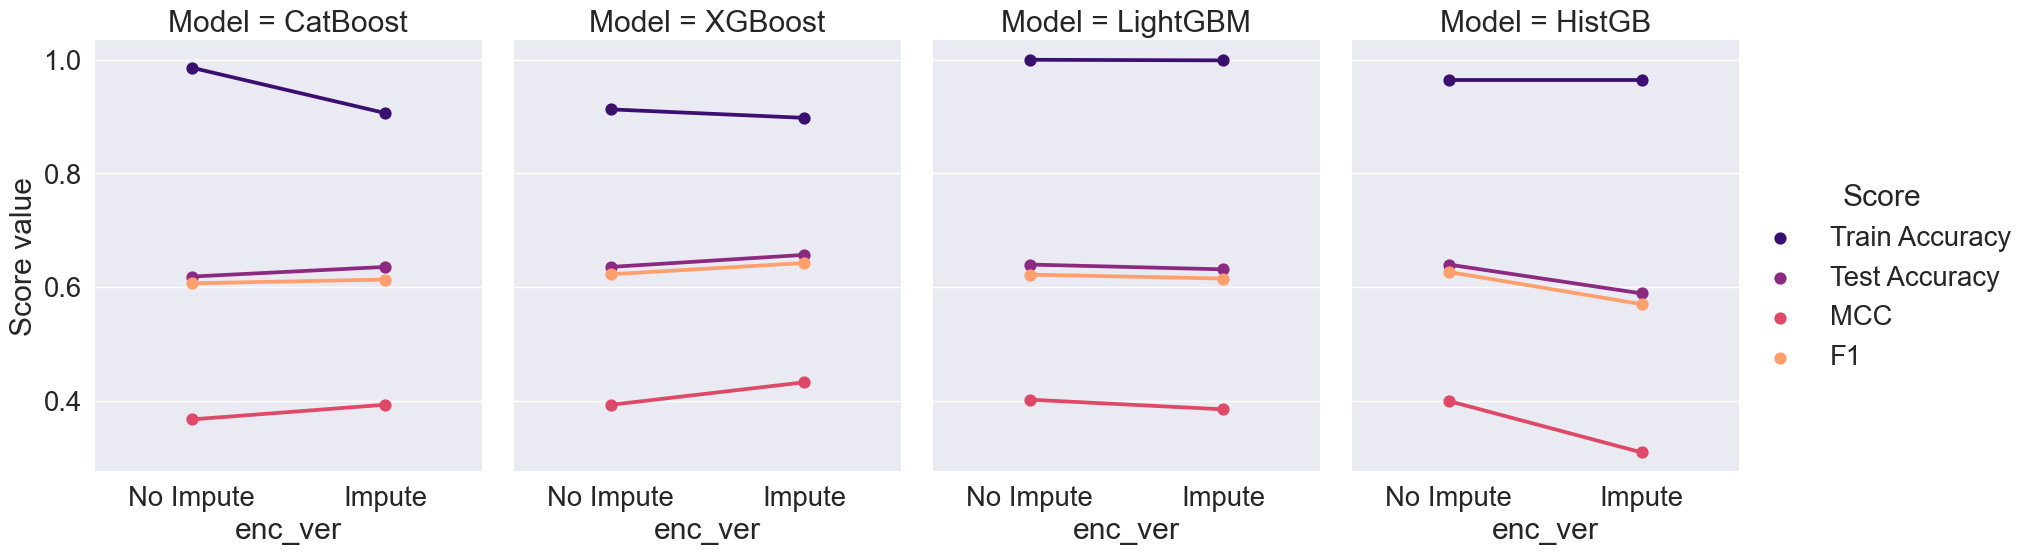

In [20]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_theme(style='whitegrid')
sns.set(font_scale=1.8)

g = sns.catplot(x="enc_ver", y="Score value", hue="Score", col="Model",
                capsize=.2, palette="magma", height=6, aspect=.75,
                kind="point", data=results2)
g.despine(left=True)
plt.show()

In [21]:
models = results['Model'].unique().tolist()
temp=results.sort_values(by=['Model', 'MCC', 'F1'], ascending=False)

n=len(encoding_type)
best_per_model_idx = []
for i in range(len(temp.index)):
    if i % n == 0: best_per_model_idx.append(temp.index[i])

**Confusion Matrix**

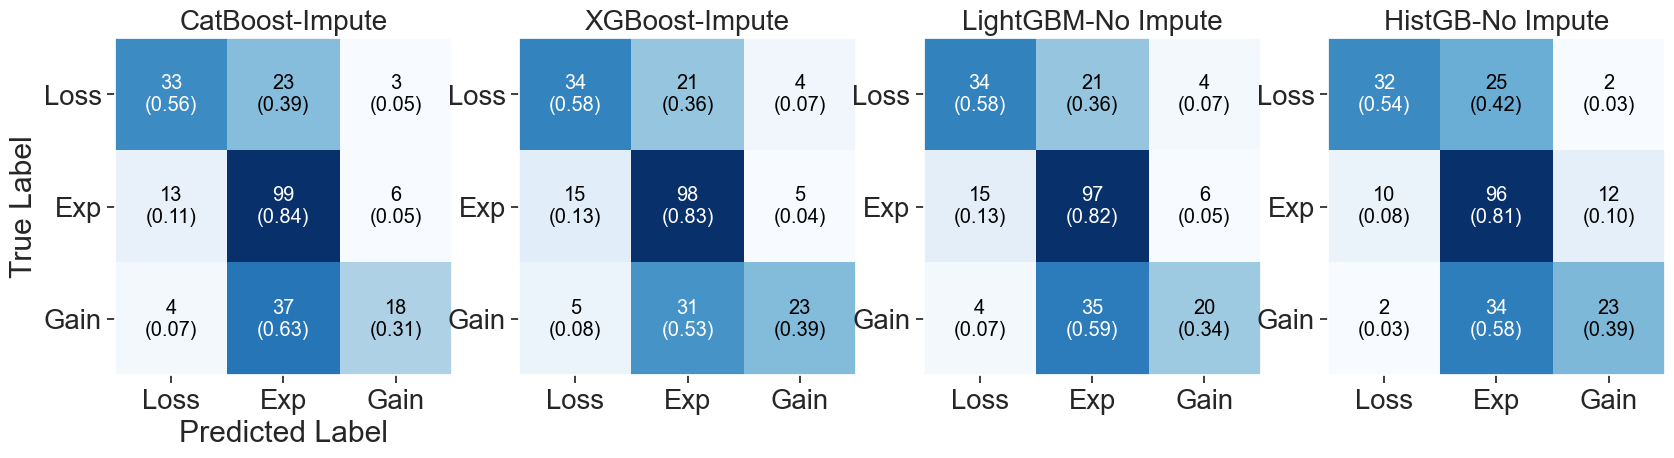

In [22]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.ticker as mticker

def ticks(x, position):
    if position == 1: return 'Loss'
    if position == 2: return 'Exp'
    if position == 3: return 'Gain'
    
fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,10))
sns.set(font_scale=1.2)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    plot_confusion_matrix(axis=axes[i], conf_mat=results.loc[idx, 'conf_mat'],
                          show_absolute=True, show_normed=True)
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    if (i > 0): axes[i].set(xlabel='', ylabel='')
    else : axes[i].set(xlabel='Predicted Label', ylabel='True Label')
    axes[i].xaxis.set_major_formatter(mticker.FuncFormatter(ticks))
    axes[i].yaxis.set_major_formatter(mticker.FuncFormatter(ticks))
plt.show()

**ROC Curve**

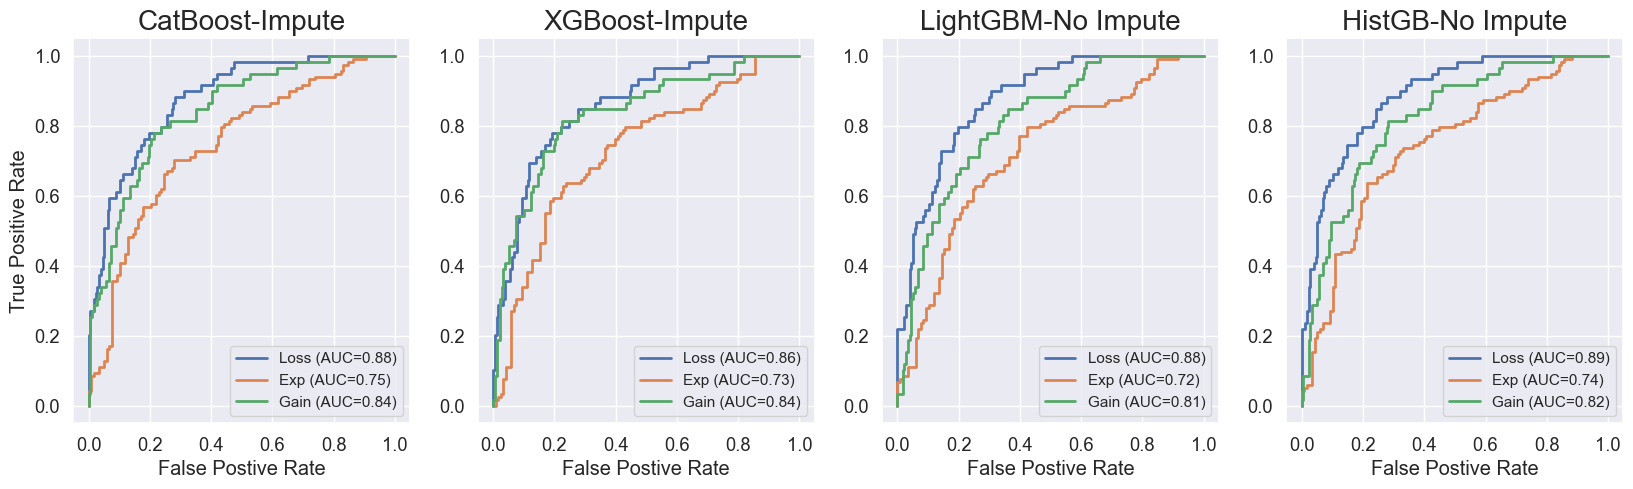

In [23]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    fpr, tpr = {}, {}

    for c in classes:
        fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(fpr[c], tpr[c], lw=2, label='{} (AUC={:0.2f})'.format(ticks(c,c+1), auc(fpr[c], tpr[c])))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("False Postive Rate")
    axes[0].set_ylabel("True Positive Rate")
    axes[i].legend(loc="best")

plt.show()

**Precision-Recall Curve**

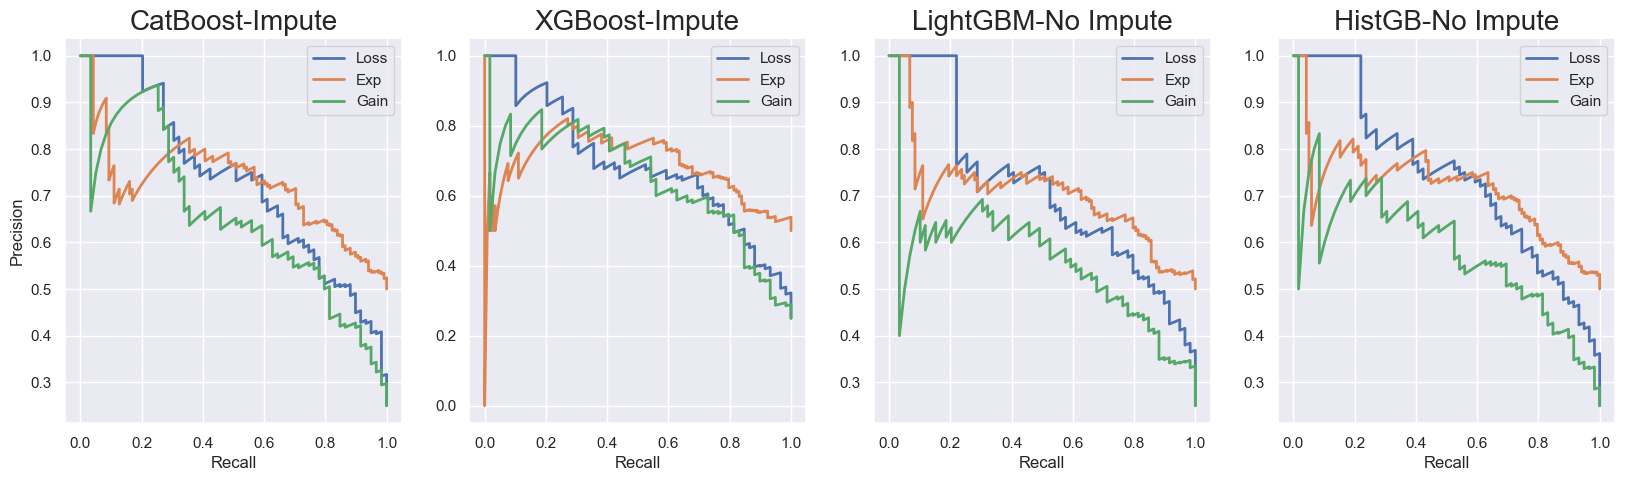

In [24]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

X_train, X_test, y_train, y_test, columns = split_data(df.copy()) 
classes=[0, 1, 2]
y_test_bin=label_binarize(y_test, classes=classes)

fig, axes=plt.subplots(1,len(best_per_model_idx), figsize=(20,5))
sns.set(font_scale=1)

for idx, i in zip(sorted(best_per_model_idx), range(len(best_per_model_idx))):
    prec, rec = {}, {}

    for c in classes:
        prec[c], rec[c], _ = precision_recall_curve(y_test_bin[:, c], results.loc[idx, 'predict_proba'][:, c])
        axes[i].plot(rec[c], prec[c], lw=2, label='{}'.format(ticks(c,c+1)))
    
    title='{}-{}'.format(results.loc[idx, 'Model'], results.loc[idx, 'enc_ver'])
    axes[i].set_title(title, fontsize=20)
    axes[i].set_xlabel("Recall")
    axes[0].set_ylabel("Precision")
    axes[i].legend(loc="best")

plt.show()